# - DIABETES PREDICTION -

Import Necessory library

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

## Reading The Dataset: 

In [7]:
dataset=pd.read_csv('dataset4.csv')
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [9]:
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'gender' column
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])

# Encode 'smoking_history' column
dataset['smoking_history'] = label_encoder.fit_transform(dataset['smoking_history'])

dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [11]:
x=dataset[['blood_glucose_level','bmi']].values
x

array([[140.  ,  25.19],
       [ 80.  ,  27.32],
       [158.  ,  27.32],
       ...,
       [155.  ,  27.83],
       [100.  ,  35.42],
       [ 90.  ,  22.43]])

In [12]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [14]:
print(x_test)

[[140.    27.32]
 [100.    27.32]
 [ 85.    37.16]
 ...
 [158.    28.56]
 [145.    27.32]
 [155.    16.36]]


In [15]:
print(y_test)

[0 0 0 ... 0 0 0]


In [16]:
modelRFC = RandomForestClassifier()
RFC=modelRFC.fit(x_train, y_train)
y_prediction=RFC.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
acc_score = accuracy_score(y_test, y_prediction)
print(acc_score)
acc_score2 = classification_report(y_test, y_prediction)
print(acc_score2)

0.9314
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18297
           1       0.63      0.46      0.53      1703

    accuracy                           0.93     20000
   macro avg       0.79      0.72      0.75     20000
weighted avg       0.92      0.93      0.93     20000



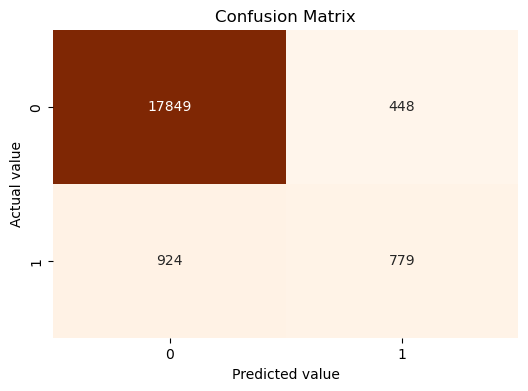

In [18]:
conf_matrix=confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [19]:
modelKNN = KNeighborsClassifier()
KNN=modelRFC.fit(x_train, y_train)
y_prediction2=RFC.predict(x_test)
y_prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
print(accuracy_score(y_test, y_prediction2))
# print(acc_score)
print(classification_report(y_test, y_prediction2))


0.9309
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18297
           1       0.63      0.46      0.53      1703

    accuracy                           0.93     20000
   macro avg       0.79      0.72      0.75     20000
weighted avg       0.92      0.93      0.93     20000



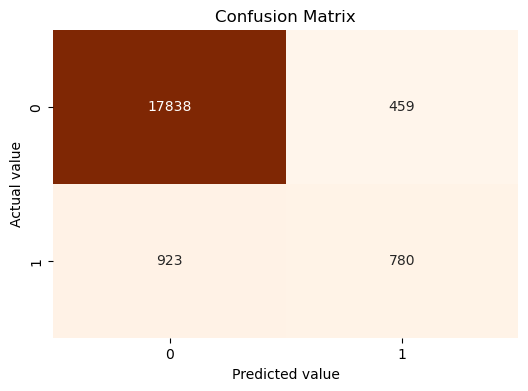

In [21]:
conf_matrix=confusion_matrix(y_test,y_prediction2)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [22]:
modelADBC = AdaBoostClassifier()
ADBC=modelADBC.fit(x_train, y_train)
y_prediction3=ADBC.predict(x_test)
y_prediction3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print(accuracy_score(y_test, y_prediction3))
# print(acc_score)
print(classification_report(y_test, y_prediction3))


0.94885
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18297
           1       1.00      0.40      0.57      1703

    accuracy                           0.95     20000
   macro avg       0.97      0.70      0.77     20000
weighted avg       0.95      0.95      0.94     20000



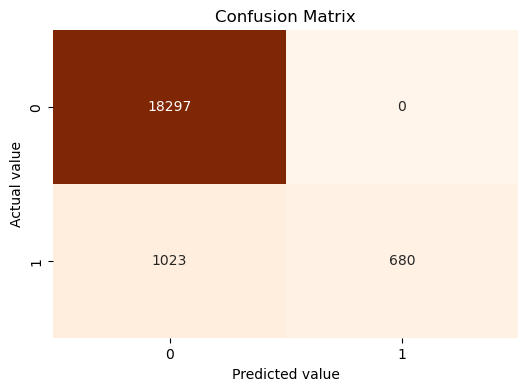

In [24]:
conf_matrix=confusion_matrix(y_test,y_prediction3)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [25]:
modelLR = LinearRegression()
LR = modelLR.fit(x_train, y_train)
y_prediction4 = LR.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_prediction4)
mae = mean_absolute_error(y_test, y_prediction4)
r2 = r2_score(y_test, y_prediction4)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.06138182584238609
Mean Absolute Error: 0.15763704999008504
R-squared: 0.2120380288508854


In [27]:
modelDTC = DecisionTreeClassifier()
DTC=modelDTC.fit(x_train, y_train)
y_prediction5=DTC.predict(x_test)
y_prediction5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(accuracy_score(y_test, y_prediction5))
# print(acc_score)
print(classification_report(y_test, y_prediction5))


0.93545
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18297
           1       0.68      0.45      0.55      1703

    accuracy                           0.94     20000
   macro avg       0.82      0.72      0.76     20000
weighted avg       0.93      0.94      0.93     20000



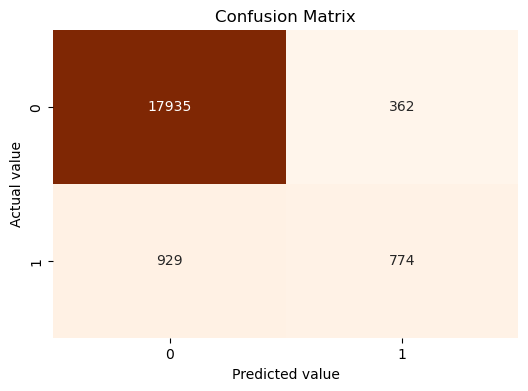

In [29]:
conf_matrix=confusion_matrix(y_test,y_prediction5)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()